In [1]:
!git clone https://github.com/SeventhSERGIO/datasets

fatal: destination path 'datasets' already exists and is not an empty directory.


# Bibliotecas necesarias y configuración inicial

In [2]:
import geopandas as gpd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
#jtplot.style(context='notebook', ticks=False, spines=False)
plt.rc('axes', axisbelow=True)
plt.rc('axes', facecolor=(230/255,236/255,245/255))
plt.rc('figure', facecolor=(1,1,1,0), titleweight='bold')
plt.rc('grid', color=(1,1,1,0))
plt.rc('legend', facecolor='white')

## Funciones a utilizar

Función para obtener la matriz de distancias entre cada punto.

In [4]:
def point_to_point_distance(points):
    points = points.to_numpy()
    N = points.shape[0]
    points_dist = np.zeros((N,N))
    for i in range(N):
        point = points[[i]]
        points_dist[[i]] = cdist(point, points)
    return points_dist

Función para emparejar la frecuencia de aparición de cada ciudad en el conjunto de datos.

In [5]:
def add_frequencies(dataset, index_array, column_name):
    vals, freq = np.unique(index_array, return_counts=True)
    temp_series = pd.Series(data=freq, index=vals).rename(column_name)
    return pd.merge(dataset, temp_series, how='outer', left_index=True, right_index=True).fillna(0)

# Obtención de los datos

In [6]:
# Read the coordinates of the cities from the file
dataset = pd.read_csv('https://raw.githubusercontent.com/SeventhSERGIO/datasets/main/mexico_cities.csv')
dataset

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
0,Mexico City,Mexico City,9209944,19.432500,-99.131110,23.0,25.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
2,Ecatepec,State of Mexico,1643623,19.609720,-99.060000,23.0,24.0,22.0,15.0,18.0,14.0,8.0,13.0,7.0
3,León,Guanajuato,1579803,21.119720,-101.680560,25.0,29.0,24.0,16.0,22.0,15.0,8.0,16.0,7.0
4,Puebla,Puebla,1542232,19.045280,-98.197500,23.0,24.0,22.0,14.0,18.0,13.0,7.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Kanasín,Yucatán,139753,20.934444,-89.557778,31.0,35.0,29.0,24.0,28.0,24.0,19.0,24.0,19.0
125,Fresnillo,Zacatecas,143281,23.174895,-102.868229,21.0,27.0,20.0,12.0,20.0,11.0,3.0,13.0,2.0
126,Zacatecas,Zacatecas,138444,22.771667,-102.575278,20.0,25.0,18.0,11.0,18.0,9.0,2.0,11.0,1.0
127,Tlaxcala de Xicohténcatl,Tlaxcala,13555,19.316950,-98.238231,22.0,23.0,21.0,13.0,17.0,12.0,6.0,12.0,6.0


In [7]:
# Filtra sólo columnas numéricas
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Detección de anomalías

## Z-Score

In [8]:
dataset_zscore = dataset[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())
dataset_zscore

,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
0,10.171703,-0.678155,0.310415,-0.576411,-1.082944,-0.429944,-0.313109,-1.303986,-0.474279,-0.523242,-0.981501,-0.537492
1,1.547575,2.600248,-2.883135,-1.815693,-1.529269,-1.305671,-0.827645,-1.303986,-0.704286,-0.320545,-0.567731,-0.172563
2,1.352905,-0.633812,0.323093,-0.576411,-1.306107,-0.429944,-0.570377,-1.303986,-0.474279,-0.523242,-1.188386,-0.537492
3,1.278521,-0.255984,-0.144116,0.043231,-0.190294,0.153875,-0.313109,-0.435784,-0.244271,-0.523242,-0.567731,-0.537492
4,1.234730,-0.775044,0.476865,-0.576411,-1.306107,-0.429944,-0.827645,-1.303986,-0.704286,-0.725940,-1.188386,-0.719957
...,...,...,...,...,...,...,...,...,...,...,...,...
124,-0.399905,-0.302343,2.017208,1.902155,1.148682,1.613420,1.745034,0.866519,1.825795,1.706430,1.087349,1.652081
125,-0.395793,0.258257,-0.355861,-1.196052,-0.636619,-1.013762,-1.342180,-0.869885,-1.164301,-1.536730,-1.188386,-1.449814
126,-0.401431,0.157362,-0.303632,-1.505872,-1.082944,-1.597580,-1.599448,-1.303986,-1.624316,-1.739427,-1.602155,-1.632279
127,-0.546993,-0.707068,0.469603,-0.886231,-1.529269,-0.721853,-1.084912,-1.521036,-0.934294,-0.928637,-1.395270,-0.719957


In [9]:
# Población
dataset.iloc[dataset_zscore.nlargest(10, 'Population').index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
0,Mexico City,Mexico City,9209944,19.43250,-99.13111,23.0,25.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
1,Tijuana,Baja California,1810645,32.53472,-117.04361,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
2,Ecatepec,State of Mexico,1643623,19.60972,-99.06000,23.0,24.0,22.0,15.0,18.0,14.0,8.0,13.0,7.0
3,León,Guanajuato,1579803,21.11972,-101.68056,25.0,29.0,24.0,16.0,22.0,15.0,8.0,16.0,7.0
4,Puebla,Puebla,1542232,19.04528,-98.19750,23.0,24.0,22.0,14.0,18.0,13.0,7.0,13.0,6.0
5,Ciudad Juárez,Chihuahua,1501551,31.73944,-106.48694,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
6,Guadalajara,Jalisco,1385621,20.67639,-103.34222,26.0,29.0,24.0,16.0,22.0,14.0,6.0,16.0,6.0
7,Zapopan,Jalisco,1257547,20.72056,-103.38833,26.0,29.0,24.0,16.0,22.0,14.0,6.0,17.0,6.0
8,Monterrey,Nuevo León,1142952,25.67139,-100.30861,24.0,34.0,22.0,17.0,28.0,15.0,12.0,23.0,11.0
9,Ciudad Nezahualcóyotl,State of Mexico,1072676,19.40000,-98.98889,23.0,24.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0


In [10]:
# Coordenadas geográficas
dataset.iloc[dataset_zscore.nsmallest(10, 'Longitude').index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
100,Rosarito,Baja California,126890,32.363611,-117.054444,18.0,21.0,18.0,14.0,18.0,13.0,11.0,16.0,10.0
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
51,Ensenada,Baja California,330652,31.857780,-116.605830,20.0,26.0,21.0,14.0,21.0,14.0,10.0,16.0,10.0
17,Mexicali,Baja California,854186,32.663330,-115.467780,23.0,39.0,21.0,16.0,31.0,13.0,9.0,22.0,7.0
84,San Luis Río Colorado,Sonora,176685,32.476670,-114.762500,23.0,39.0,21.0,16.0,32.0,13.0,11.0,24.0,8.0
16,Hermosillo,Sonora,855563,29.098890,-110.954170,27.0,39.0,24.0,18.0,32.0,16.0,10.0,24.0,9.0
65,Nogales,Sonora,261137,31.318610,-110.945830,19.0,34.0,18.0,10.0,26.0,8.0,3.0,17.0,2.0
119,Guaymas,Sonora,117253,27.919167,-110.897500,22.0,32.0,23.0,17.0,28.0,17.0,11.0,24.0,11.0
67,La Paz,Baja California Sur,250141,24.142220,-110.310830,26.0,35.0,25.0,19.0,27.0,19.0,12.0,21.0,13.0
52,Ciudad Obregón,Sonora,329404,27.489170,-109.935000,26.0,37.0,26.0,18.0,31.0,17.0,11.0,24.0,11.0


In [11]:
# Temperatura
dataset.iloc[dataset_zscore.nsmallest(10, 'High_Feb').index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
103,Cuauhtémoc,Chihuahua,180638,28.405000,-106.866667,16.0,29.0,14.0,7.0,22.0,5.0,0.0,13.0,-2.0
100,Rosarito,Baja California,126890,32.363611,-117.054444,18.0,21.0,18.0,14.0,18.0,13.0,11.0,16.0,10.0
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
5,Ciudad Juárez,Chihuahua,1501551,31.739440,-106.486940,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
65,Nogales,Sonora,261137,31.318610,-110.945830,19.0,34.0,18.0,10.0,26.0,8.0,3.0,17.0,2.0
51,Ensenada,Baja California,330652,31.857780,-116.605830,20.0,26.0,21.0,14.0,21.0,14.0,10.0,16.0,10.0
73,Toluca,State of Mexico,910608,19.292220,-99.653890,20.0,21.0,19.0,11.0,14.0,9.0,1.0,9.0,1.0
126,Zacatecas,Zacatecas,138444,22.771667,-102.575278,20.0,25.0,18.0,11.0,18.0,9.0,2.0,11.0,1.0
10,Chihuahua,Chihuahua,925762,28.635280,-106.088890,21.0,34.0,18.0,11.0,27.0,9.0,3.0,18.0,1.0
14,Saltillo,Coahuila,864431,25.433330,-101.000000,21.0,28.0,19.0,13.0,22.0,12.0,7.0,16.0,6.0


## Boxplots

In [12]:
import seaborn as sns
def anomalies_indexes(x):
    Q1,Q3 = np.percentile(x, [25, 75])
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5*IQR
    upp_limit = Q3 + 1.5*IQR
    # Lo que cae fuera de los límites
    anomalies = np.where( (x < low_limit) | (x > upp_limit) )
    # Entregará los índices de las anomalías. De este modo podemos filtrarlas
    return anomalies[0]

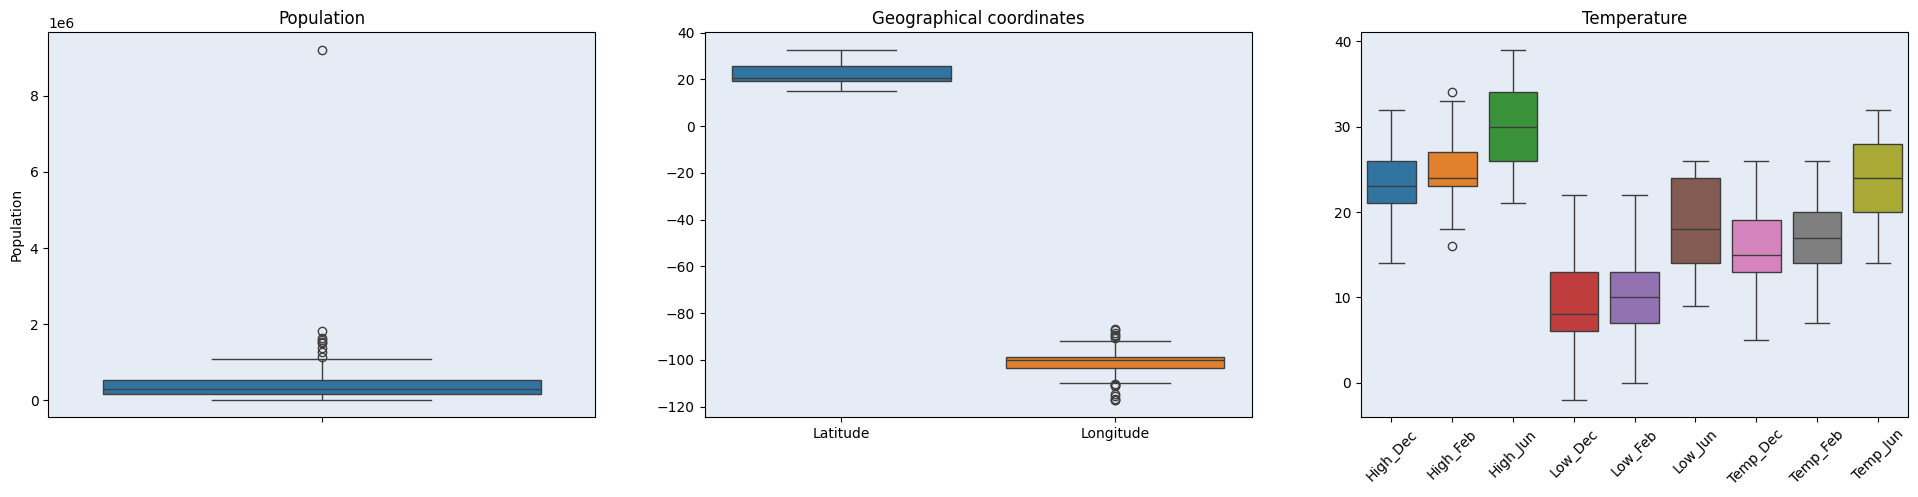

In [13]:
fig, ax = plt.subplots(1,3, figsize = (24,5))

sns.boxplot(dataset['Population'], ax=ax[0]).set_title("Population")
sns.boxplot(dataset[['Latitude', 'Longitude']], ax=ax[1]).set_title("Geographical coordinates")

sns.boxplot(dataset[numerical_columns.difference({'Population', 'Latitude', 'Longitude'})], ax=ax[2]).set_title("Temperature")
_ = plt.setp(ax[2].get_xticklabels(), rotation=45)

- **Población:** En este caso es claro que la distribución de la población es sesgada, debido a que hay más concentración en las grandes urbes capitales. Así que el boxplot detecta estos casos extremos como anómalos.

- **Coordenadas geográficas:** Esto puede ser seña de que las ciudades, a pesar de estar sesgadas, no están muy alejadas de norte a sur. En el caso de este a oeste, parece que sí hay mayor concentración en ciertas longitudes y por ello algunas son detectadas como anómalas.

- **Temperatura:** De entrada se observa que, por ejemplo, junio es muy parecida a una normal (en low, temp y high). También febrero lo es en low y temp, pero en high la mediana se desplaza y muestra algunos valores extremos.

In [14]:
print("Anomalías de población: ")
dataset[['City', 'State', 'Population']].iloc[anomalies_indexes(dataset['Population'])]

Anomalías de población: 


,City,State,Population
0,Mexico City,Mexico City,9209944
1,Tijuana,Baja California,1810645
2,Ecatepec,State of Mexico,1643623
3,León,Guanajuato,1579803
4,Puebla,Puebla,1542232
5,Ciudad Juárez,Chihuahua,1501551
6,Guadalajara,Jalisco,1385621
7,Zapopan,Jalisco,1257547
8,Monterrey,Nuevo León,1142952


In [15]:
print("Anomalías de coordenadas: ")
dataset[['City', 'State', 'Latitude', 'Longitude']].iloc[anomalies_indexes(dataset['Longitude'])]

Anomalías de coordenadas: 


,City,State,Latitude,Longitude
1,Tijuana,Baja California,32.534720,-117.043610
11,Mérida,Yucatán,20.967780,-89.621670
13,Cancún,Quintana Roo,21.160560,-86.847500
16,Hermosillo,Sonora,29.098890,-110.954170
17,Mexicali,Baja California,32.663330,-115.467780
51,Ensenada,Baja California,31.857780,-116.605830
56,Playa del Carmen,Quintana Roo,20.627500,-87.081110
65,Nogales,Sonora,31.318610,-110.945830
67,La Paz,Baja California Sur,24.142220,-110.310830
68,Campeche,Campeche,19.845830,-90.536670


In [16]:
print("Anomalías de temperatura: ")
dataset[['City', 'State', 'High_Feb']].iloc[anomalies_indexes(dataset['High_Feb'])]

Anomalías de temperatura: 


,City,State,High_Feb
103,Cuauhtémoc,Chihuahua,16.0
112,Apatzingán,Michoacán,34.0


## Local Outlier Factor (LOF)

In [17]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

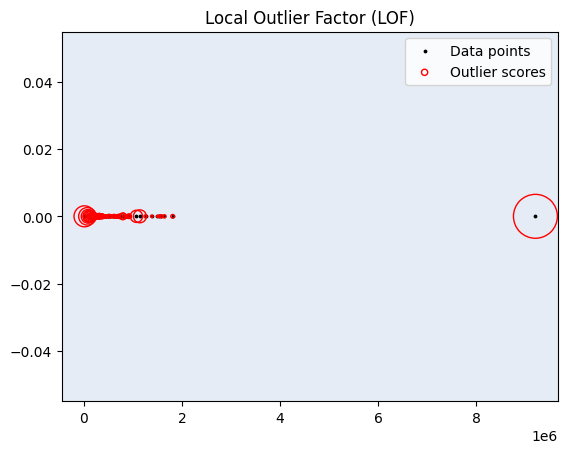

In [18]:
# Población
X = dataset['Population'].to_numpy().reshape(-1,1)

# Definir y ajustar la técnica
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Graficar
plt.scatter(X, [0]*len(X), color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X,
    [0]*len(X),
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

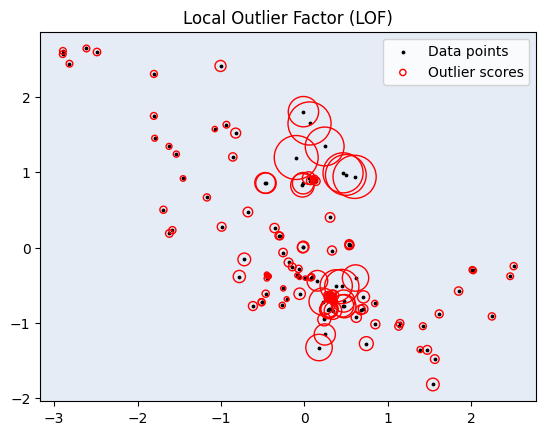

In [19]:
# Coordenadas Geográficas
X = dataset[['Latitude','Longitude']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir y ajustar la técnica
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

plt.scatter(X[:, 1], X[:, 0], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 1],
    X[:, 0],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

Text(0.5, 0.98, 'LOF | Nivel temperatura por Mes')

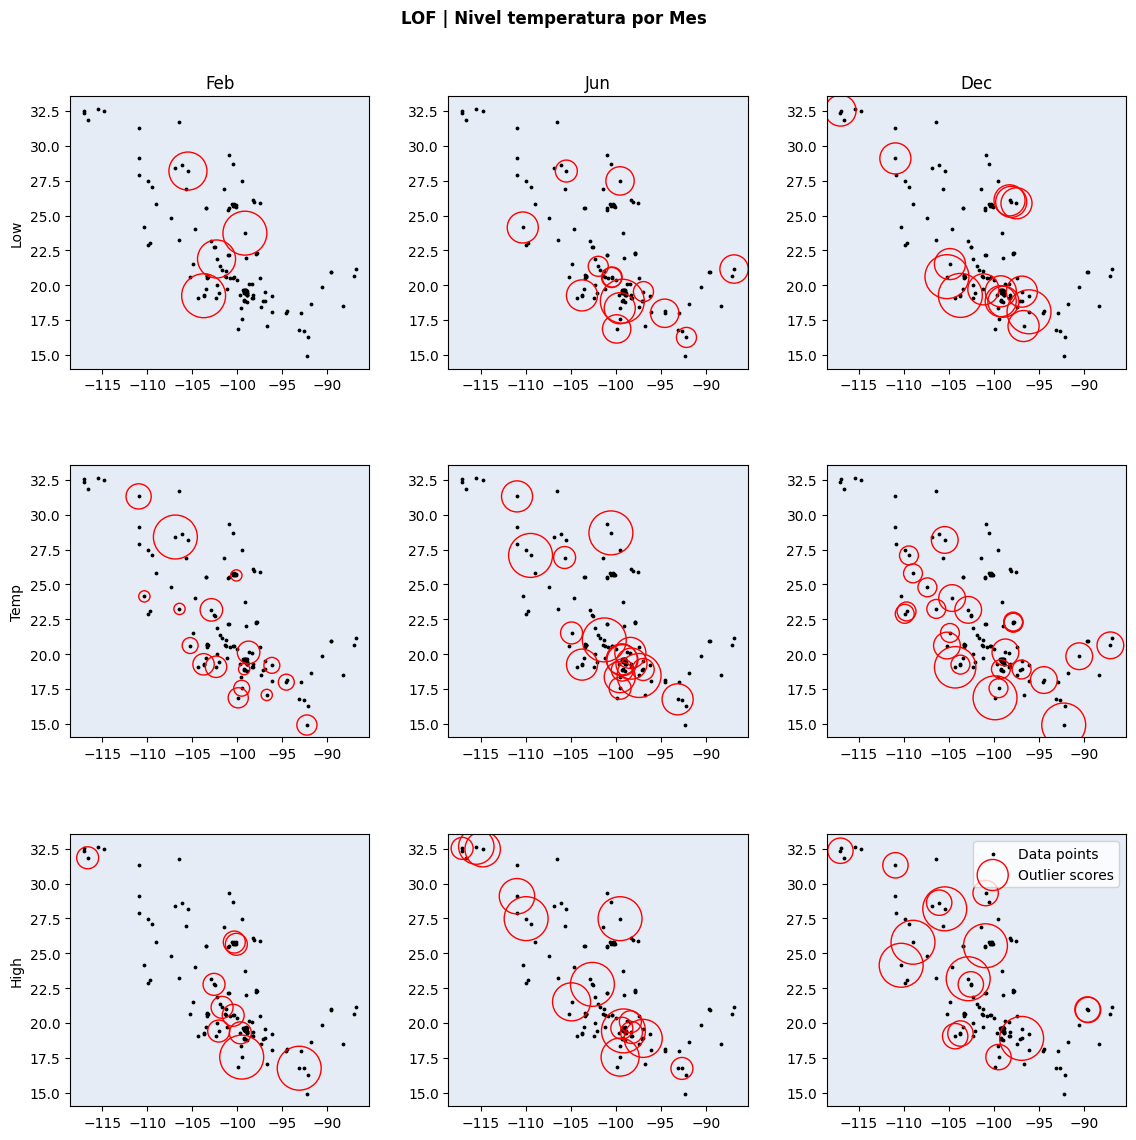

In [20]:
# Temperatura | por mes y rango
fig, axs = plt.subplots(3,3)

# Definir y ajustar la técnica
X_full = dataset[numerical_columns.difference({'Population', 'Latitude', 'Longitude'})]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Graficar
levels = ['Low', 'Temp', 'High']
months = ['Feb', 'Jun', 'Dec']

for ax_row, lvl in zip(axs, levels):
    for ax, mon in zip(ax_row, months):
        # Ajuste para la combinación de level y month
        X = X_full[lvl + '_' + mon].to_numpy().reshape(-1,1)
        clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
        y_pred = clf.fit_predict(X)
        X_scores = clf.negative_outlier_factor_

        ax.scatter(dataset['Longitude'], dataset['Latitude'], color="k", s=3.0, label="Data points")
        # plot circles with radius proportional to the outlier scores
        radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
        ax.scatter(
            dataset['Longitude'],
            dataset['Latitude'],
            s=1000 * radius,
            edgecolors="r",
            facecolors="none",
            label="Outlier scores",
        )
        if lvl == 'Low':
            ax.set_title(mon)
        if mon == 'Feb':
            ax.set_ylabel(lvl)
fig.tight_layout()
plt.legend(handler_map={ax: HandlerPathCollection(update_func=update_legend_marker_size)})
fig.set_size_inches(12,12)
fig.suptitle("LOF | Nivel temperatura por Mes", va='bottom')
# plt.show()

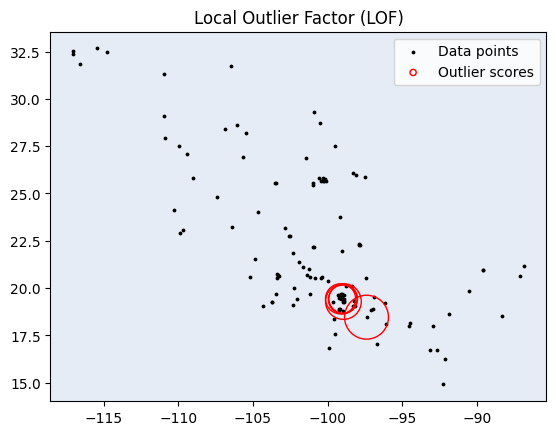

In [21]:
# Temperatura general

# Definir y ajustar la técnica
X = dataset[numerical_columns.difference({'Population', 'Latitude', 'Longitude'})]

clf = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Graficar
plt.scatter(dataset['Longitude'], dataset['Latitude'], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    dataset['Longitude'],
    dataset['Latitude'],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

In [22]:
dataset[y_pred == -1]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
0,Mexico City,Mexico City,9209944,19.432500,-99.131110,23.0,25.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
9,Ciudad Nezahualcóyotl,State of Mexico,1072676,19.400000,-98.988890,23.0,24.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
22,Chimalhuacán,State of Mexico,703215,19.437500,-98.954170,23.0,24.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
41,Nuevo Laredo,Tamaulipas,416055,27.486390,-99.508060,24.0,37.0,21.0,17.0,31.0,14.0,12.0,25.0,10.0
44,Xico,State of Mexico,384327,19.291670,-98.938890,23.0,24.0,22.0,16.0,18.0,14.0,8.0,13.0,7.0
63,Tehuacán,Puebla,293825,18.463890,-97.393060,22.0,26.0,21.0,15.0,19.0,14.0,9.0,14.0,8.0
73,Toluca,State of Mexico,910608,19.292220,-99.653890,20.0,21.0,19.0,11.0,14.0,9.0,1.0,9.0,1.0
81,San Cristóbal de las Casas,Chiapas,183509,16.736670,-92.638330,22.0,23.0,21.0,14.0,18.0,14.0,6.0,12.0,6.0
100,Rosarito,Baja California,126890,32.363611,-117.054444,18.0,21.0,18.0,14.0,18.0,13.0,11.0,16.0,10.0


## Isolation Forest

In [23]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [24]:
## Población
X = dataset['Population'].to_numpy().reshape(-1,1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aplicar IF
clf = IsolationForest(n_estimators=10, warm_start=True)
y_pred = clf.fit_predict(X)  # fit 10 trees

# Filtrar anomalías
anomaly_index = np.where(y_pred==-1)
dataset.iloc[anomaly_index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
0,Mexico City,Mexico City,9209944,19.432500,-99.131110,23.0,25.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
2,Ecatepec,State of Mexico,1643623,19.609720,-99.060000,23.0,24.0,22.0,15.0,18.0,14.0,8.0,13.0,7.0
3,León,Guanajuato,1579803,21.119720,-101.680560,25.0,29.0,24.0,16.0,22.0,15.0,8.0,16.0,7.0
4,Puebla,Puebla,1542232,19.045280,-98.197500,23.0,24.0,22.0,14.0,18.0,13.0,7.0,13.0,6.0
5,Ciudad Juárez,Chihuahua,1501551,31.739440,-106.486940,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
6,Guadalajara,Jalisco,1385621,20.676390,-103.342220,26.0,29.0,24.0,16.0,22.0,14.0,6.0,16.0,6.0
7,Zapopan,Jalisco,1257547,20.720560,-103.388330,26.0,29.0,24.0,16.0,22.0,14.0,6.0,17.0,6.0
8,Monterrey,Nuevo León,1142952,25.671390,-100.308610,24.0,34.0,22.0,17.0,28.0,15.0,12.0,23.0,11.0
9,Ciudad Nezahualcóyotl,State of Mexico,1072676,19.400000,-98.988890,23.0,24.0,22.0,16.0,18.0,14.0,8.0,14.0,7.0


In [25]:
# Coordenadas Geográficas
X = dataset[['Latitude','Longitude']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

clf = IsolationForest(n_estimators=10, warm_start=True)
y_pred = clf.fit_predict(X)  # fit 10 trees

In [26]:
## Coordenadas Geográficas
X = dataset[['Latitude','Longitude']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aplicar IF
clf = IsolationForest(n_estimators=10, warm_start=True)
y_pred = clf.fit_predict(X)  # fit 10 trees

# Filtrar anomalías
anomaly_index = np.where(y_pred==-1)
dataset.iloc[anomaly_index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
5,Ciudad Juárez,Chihuahua,1501551,31.739440,-106.486940,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
11,Mérida,Yucatán,921771,20.967780,-89.621670,31.0,34.0,29.0,24.0,28.0,24.0,19.0,24.0,19.0
13,Cancún,Quintana Roo,888797,21.160560,-86.847500,28.0,31.0,28.0,24.0,28.0,24.0,20.0,25.0,21.0
16,Hermosillo,Sonora,855563,29.098890,-110.954170,27.0,39.0,24.0,18.0,32.0,16.0,10.0,24.0,9.0
17,Mexicali,Baja California,854186,32.663330,-115.467780,23.0,39.0,21.0,16.0,31.0,13.0,9.0,22.0,7.0
26,Acapulco,Guerrero,658609,16.861670,-99.886390,31.0,32.0,31.0,26.0,28.0,26.0,21.0,25.0,22.0
30,Tuxtla Gutiérrez,Chiapas,578830,16.753060,-93.115560,30.0,31.0,28.0,23.0,26.0,22.0,18.0,22.0,17.0
31,Veracruz,Veracruz,537963,19.190280,-96.153330,27.0,32.0,27.0,22.0,28.0,22.0,18.0,24.0,19.0
49,Villahermosa,Tabasco,340060,17.989170,-92.928060,29.0,34.0,28.0,24.0,28.0,24.0,20.0,24.0,21.0


In [27]:
## Temperatura
X = dataset[numerical_columns.difference({'Population', 'Latitude', 'Longitude'})]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Aplicar IF
clf = IsolationForest(n_estimators=20, warm_start=False)
y_pred = clf.fit_predict(X)  # fit 20 trees

# Filtrar anomalías
anomaly_index = np.where(y_pred==-1)
dataset.iloc[anomaly_index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
5,Ciudad Juárez,Chihuahua,1501551,31.739440,-106.486940,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
10,Chihuahua,Chihuahua,925762,28.635280,-106.088890,21.0,34.0,18.0,11.0,27.0,9.0,3.0,18.0,1.0
16,Hermosillo,Sonora,855563,29.098890,-110.954170,27.0,39.0,24.0,18.0,32.0,16.0,10.0,24.0,9.0
26,Acapulco,Guerrero,658609,16.861670,-99.886390,31.0,32.0,31.0,26.0,28.0,26.0,21.0,25.0,22.0
29,Durango,Durango,616068,24.022780,-104.654440,23.0,29.0,21.0,13.0,22.0,11.0,3.0,14.0,2.0
41,Nuevo Laredo,Tamaulipas,416055,27.486390,-99.508060,24.0,37.0,21.0,17.0,31.0,14.0,12.0,25.0,10.0
52,Ciudad Obregón,Sonora,329404,27.489170,-109.935000,26.0,37.0,26.0,18.0,31.0,17.0,11.0,24.0,11.0
61,Pachuca,Hidalgo,297848,20.121670,-98.735830,21.0,22.0,19.0,12.0,16.0,11.0,6.0,11.0,4.0
62,Tampico,Tamaulipas,297373,22.255280,-97.868610,24.0,32.0,24.0,20.0,29.0,20.0,17.0,26.0,17.0


## DBSCAN

In [28]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

def dbscan_feat(xy, data):
    db = DBSCAN(eps=0.3, min_samples=10).fit(data)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    # Graficar
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy_p = xy[class_member_mask & core_samples_mask]
        plt.plot(
            xy_p[:, 0],
            xy_p[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy_p = xy[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy_p[:, 0],
            xy_p[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.show()

    return labels

Estimated number of clusters: 1
Estimated number of noise points: 7


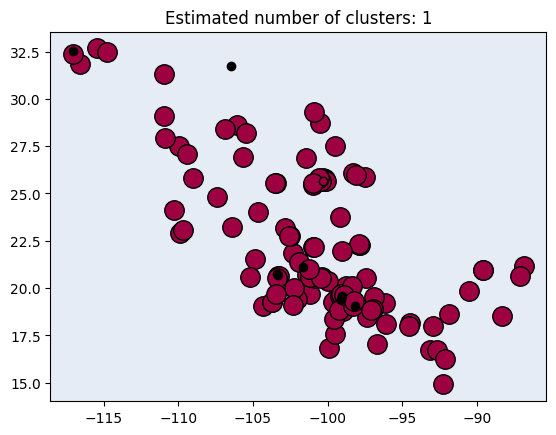

In [29]:
# Población
X = dataset['Population'].to_numpy().reshape(-1,1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

xy = dataset[['Longitude', 'Latitude']].to_numpy()
labels_pop = dbscan_feat(xy, X)

Estimated number of clusters: 2
Estimated number of noise points: 57


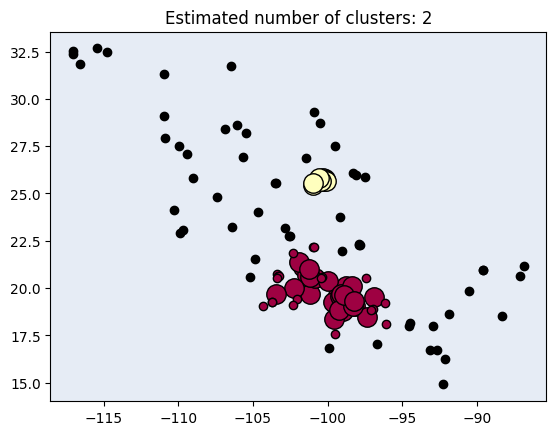

In [30]:
# Coordenadas Geográficas
X = dataset[['Latitude','Longitude']].to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

xy = dataset[['Longitude', 'Latitude']].to_numpy()
labels_coord = dbscan_feat(xy, X)

In [31]:
anomaly_index = np.where(labels_coord==-1)
dataset.iloc[anomaly_index]

,City,State,Population,Latitude,Longitude,High_Feb,High_Jun,High_Dec,Temp_Feb,Temp_Jun,Temp_Dec,Low_Feb,Low_Jun,Low_Dec
1,Tijuana,Baja California,1810645,32.534720,-117.043610,19.0,23.0,19.0,14.0,18.0,13.0,9.0,16.0,9.0
5,Ciudad Juárez,Chihuahua,1501551,31.739440,-106.486940,19.0,36.0,15.0,11.0,29.0,8.0,4.0,22.0,2.0
10,Chihuahua,Chihuahua,925762,28.635280,-106.088890,21.0,34.0,18.0,11.0,27.0,9.0,3.0,18.0,1.0
11,Mérida,Yucatán,921771,20.967780,-89.621670,31.0,34.0,29.0,24.0,28.0,24.0,19.0,24.0,19.0
13,Cancún,Quintana Roo,888797,21.160560,-86.847500,28.0,31.0,28.0,24.0,28.0,24.0,20.0,25.0,21.0
16,Hermosillo,Sonora,855563,29.098890,-110.954170,27.0,39.0,24.0,18.0,32.0,16.0,10.0,24.0,9.0
17,Mexicali,Baja California,854186,32.663330,-115.467780,23.0,39.0,21.0,16.0,31.0,13.0,9.0,22.0,7.0
19,Culiacán,Sinaloa,808416,24.791940,-107.398060,29.0,36.0,28.0,20.0,29.0,20.0,13.0,24.0,14.0
23,Reynosa,Tamaulipas,691557,26.092220,-98.277780,24.0,35.0,23.0,18.0,29.0,17.0,13.0,24.0,12.0
24,Torreón,Coahuila,690193,25.544440,-103.441670,26.0,35.0,23.0,17.0,29.0,15.0,10.0,22.0,8.0


Estimated number of clusters: 1
Estimated number of noise points: 119


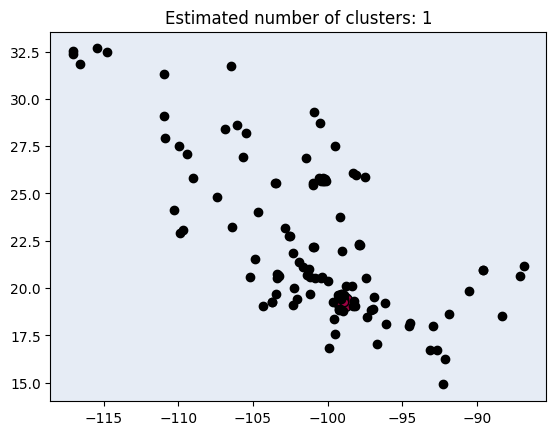

In [32]:
# Temperatura
X = dataset[numerical_columns.difference({'Population', 'Latitude', 'Longitude'})]
scaler = StandardScaler()
X = scaler.fit_transform(X)

xy = dataset[['Longitude', 'Latitude']].to_numpy()
labels_temp = dbscan_feat(xy, X)